In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [37]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 100)
pd.set_option('display.max_colwidth', 100)

In [18]:
data = pd.read_csv('AutoScout_data_cleaning_without_extras.csv')
data.head(3)

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
0,Audi,A1,Sedans,1.4,15770,VAT deductible,56013.0,2016.0,2.0,66.0,Used,2.0,Yes,Black,Metallic,Mythosschwarz,Cloth,Black,5.0,5.0,0588/BDF,Automatic,"1,422",3.0,"1,220",Diesel,3.8,4.3,3.5,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate control,Cruise control,Electrical side mirrors,Hill H...","Bluetooth,Hands-free equipment,On-board computer,Radio","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog..."
1,Audi,A1,Sedans,1.8,14500,Price negotiable,80000.0,2017.0,NaN,141.0,Used,NaN,NaN,Red,NaN,NaN,Cloth,Grey,3.0,4.0,0588/BCY,Automatic,"1,798",4.0,"1,255",benzine,5.6,7.1,4.7,129.0,Euro 6,"Air conditioning,Automatic climate control,Hill Holder,Leather steering wheel,Lumbar support,Par...","Bluetooth,Hands-free equipment,On-board computer,Radio,Sound system","Alloy wheels,Sport seats,Sport suspension,Voice Control","ABS,Central door lock,Central door lock with remote control,Daytime running lights,Driver-side a..."
2,Audi,A1,Sedans,1.6,14640,VAT deductible,83450.0,2016.0,1.0,85.0,Used,1.0,NaN,Black,Metallic,mythosschwarz metallic,Cloth,Black,4.0,4.0,NaN,Automatic,"1,598",NaN,NaN,Diesel,3.8,4.4,3.4,99.0,Euro 6,"Air conditioning,Cruise control,Electrical side mirrors,Hill Holder,Leather steering wheel,Multi...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Imm..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 15919 non-null  object 
 1   model                15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   cc                   10851 non-null  float64
 4   price                15919 non-null  int64  
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   registration         14322 non-null  float64
 8   prev_owner           9091 non-null   float64
 9   power_hp             15831 non-null  float64
 10  vehicle_condition    15917 non-null  object 
 11  previous_owners      9279 non-null   float64
 12  Inspection_new       3932 non-null   object 
 13  body_color           15322 non-null  object 
 14  paintwork            10147 non-null  object 
 15  body_color_original  12145 non-null 

In [20]:
car  = pd.DataFrame()

### İlk olarak "body_type" sütunundaki nan değerleri dolduralım.

In [25]:
data["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

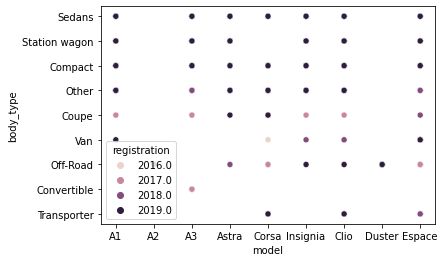

In [6]:
sns.scatterplot(x="model", y="body_type", hue="registration", data=data);

In [7]:
data[~data["body_type"].notna()][["model","registration","model_code","body_type"]]

,model,registration,model_code,body_type
3175,A3,2016.0,NaN,NaN
3255,A3,2016.0,NaN,NaN
3975,A3,2017.0,NaN,NaN
3997,A3,2017.0,NaN,NaN
4206,A3,2017.0,NaN,NaN
4297,A3,2017.0,NaN,NaN
4298,A3,2017.0,NaN,NaN
5718,Astra,2016.0,NaN,NaN
5938,Astra,2016.0,NaN,NaN
5940,Astra,2016.0,NaN,NaN


In [26]:
# 1.yöntem:

data["body_type"] = data["body_type"].fillna(data["body_type"].mode()[0])

In [36]:
# 2. yöntem: Bütün eksik body_type lara karşı gelen modeller için uygulamamız gerekir.

data.loc[data["model"]=="A3","body_type"].fillna(data[data["model"]=="A3"]["body_type"].mode()[0])

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
         ...   
2609     Sedans
2610     Sedans
2611     Sedans
2612    Compact
2613     Sedans
Name: body_type, Length: 2614, dtype: object

In [8]:
# 3. yöntem:

for group in list(data["model"].unique()):
    cond = data["model"] == group
    mode = list(data[cond]["body_type"].mode())
    if mode != []:
        data.loc[cond, "body_type"] = data.loc[cond, "body_type"].fillna(data[cond]["body_type"].mode()[0])
    else :
        data.loc[cond, "body_type"] = data.loc[cond, "body_type"].fillna(data["body_type"].mode()[0])

In [19]:
# 4. yöntem :

f= lambda x : x.mode().iloc[0]

data["body_type"] = data["body_type"].fillna(data.groupby("model")["body_type"].transform(f))

In [27]:
data["body_type"].value_counts(dropna=False)  # 1.yöntemi kullanırsak.

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [20]:
data["body_type"].value_counts(dropna=False)   # 3. ve 4. yöntemi kullanırsak aynı sonuca ulaşıyoruzb

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### "vehicle_condition" sütunundaki 2 nan değeri dolduralım. Değer sayısı az olduğundan dolayı km, price ve modele bakarak used olarak doldurduk.

In [7]:
data["vehicle_condition"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64

In [11]:
data.loc[~data["vehicle_condition"].notna()]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
2765,Audi,A3,Sedans,2.0,17900,NaN,115137.0,2016.0,NaN,110.0,NaN,NaN,NaN,White,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,968",4.0,NaN,Diesel,4.5,5.3,4.1,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."
5237,Audi,A3,Sedans,1.6,25400,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,Grey,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,598",4.0,NaN,Diesel,3.9,4.1,3.7,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."


In [21]:
data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"] = data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"].fillna("Used")

In [22]:
data["vehicle_condition"].value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

### "km" sütunundaki nan değerleri dolduralım.

In [14]:
data["km"].value_counts(dropna=False)

10.0        1045
NaN         1024
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6690, dtype: int64

In [23]:
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="New"),"km"] = 0   # km si olmayan bazı araçların yeni olduğunu gördük ve bunları 0 ile doldurduk.

In [24]:
data.loc[(~data["km"].notna())]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
981,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
983,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,Grey,Uni/basic,Grigio Freccia,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1075,Audi,A1,Sedans,1.4,19999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1904,Audi,A1,Sedans,NaN,27650,VAT deductible,NaN,2019.0,NaN,85.0,Pre-registered,NaN,NaN,White,Metallic,Bianco,Cloth,Black,5.0,4.0,NaN,Automatic,999,3.0,"1,255",benzine,4.8,5.8,4.2,108.0,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Leather steering wheel,Multi-...","Bluetooth,Radio,USB",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Emergency brake assistant,..."
1934,Audi,A1,Sedans,NaN,28499,VAT deductible,NaN,2019.0,1.0,85.0,Pre-registered,1.0,NaN,Grey,Metallic,Grigio Chronos,NaN,NaN,5.0,5.0,NaN,Automatic,999,NaN,NaN,benzine,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Electrical side mirrors,Park Distance Control,Parking...",Bluetooth,Alloy wheels,"ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stabil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,Renault,Espace,Van,1.6,34150,VAT deductible,NaN,2018.0,NaN,118.0,Pre-registered,NaN,NaN,Grey,Metallic,Grigio scuro,Full leather,Beige,5.0,7.0,NaN,Automatic,"1,598",4.0,"1,659",Diesel,4.7,5.1,4.4,120.0,NaN,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,MP3,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Pas..."
15806,Renault,Espace,Van,NaN,40999,VAT deductible,NaN,2019.0,1.0,165.0,Demonstration,1.0,Yes,Black,Metallic,Black Pearl,Full leather,Brown,5.0,5.0,3333/BHJ,Automatic,"1,798",4.0,"1,685",benzine,6.8,8.7,5.7,153.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,Driver-side airbag,Electronic stability control,Em..."
15837,Renault,Espace,Van,NaN,47450,VAT deductible,NaN,2019.0,1.0,118.0,Pre-registered,1.0,NaN,Black,Metallic,amethyst black,Full leather,Black,5.0,5.0,NaN,Automatic,"1,598",4.0,"1,734",Diesel,4.7,5.1,4.4,123.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive Cruise Control,Blind spot monitor,Daytime

In [25]:
f= lambda x : x.mean()         # daha sonra kalan nan değerleri ise model ve vehicle_cond göre km lerin ortalaması ile doldurduk.

data["km"] = data["km"].fillna(data.groupby(["model","vehicle_condition"])["km"].transform(f))

In [26]:
data["km"].value_counts(dropna=False)

10.0        1045
0.0          868
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6712, dtype: int64

In [28]:
# data.groupby(["model", "body_type", "vehicle_condition"]).price.describe()  #"registration" ilave edelim.

count  \
model    body_type     vehicle_condition           
A1       Compact       Demonstration        75.0   
                       Employee's car       79.0   
                       New                 248.0   
                       Pre-registered       19.0   
                       Used                618.0   
...                                          ...   
Insignia Station wagon Employee's car      115.0   
                       New                 206.0   
                       Pre-registered       51.0   
                       Used               1138.0   
         Van           Employee's car        1.0   

                                                  mean  \
model    body_type     vehicle_condition                 
A1       Compact       Demonstration      23404.546667   
                       Employee's car     19955.455696   
                       New                23432.568548   
                       Pre-registered     23055.000000   
                       Used               16758.276699   
...                                                ...   
Insignia Station wagon Employee's car     21677.852174   
                       New                31780.373786   
                       Pre-registered     31558.666667   
                       Used               18001.152021   
         Van           Employee's car     20980.000000   

                                                  std  \
model    body_type     vehicle_condition                
A1       Compact       Demonstration      4097.006937   
                       Employee's car     3803.376017   
                       New                3523.311326   
                       Pre-registered     2307.272921   
                       Used               3180.778682   
...                                               ...   
Insignia Station wagon Employee's car     2255.544841   
                       New                5634.808637   
                       Pre-registered     4564.469199   
                       Used               5038.105438   
         Van           Employee's car             NaN   

                                              min  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      14900.0   
                       Employee's car     13500.0   
                       New                16220.0   
                       Pre-registered     20885.0   
                       Used                9950.0   
...                                           ...   
Insignia Station wagon Employee's car     18490.0   
                       New                21992.0   
                       Pre-registered     20890.0   
                       Used                8290.0   
         Van           Employee's car     20980.0   

                                               25%  \
model    body_type     vehicle_condition             
A1       Compact       Demonstration      20970.00   
                       Employee's car     16684.50   
                       New                20800.75   
                       Pre-registered     21435.00   
                       Used               14890.00   
...                                            ...   
Insignia Station wagon Employee's car     19945.00   
                       New                26571.25   
                       Pre-registered     29995.00   
                       Used               14050.00   
         Van           Employee's car     20980.00   

                                              50%  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      22900.0   
                       Employee's car     19700.0   
                       New                22492.5   
                       Pre-registered     22140.0   
                       Used               15955.0   
...                                           ...   
Insignia Station wagon Employee's car     21390.0   

### "vat" sütunundaki nan değerleri dolduralım. Bu veri diğer değişkenlerden bağımsız olduğundan dolayı herhangi bir sütun ile ilişkilendirilemediğinden dolayı mode() ile dolduruldu.

In [38]:
data[~data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()

count          mean          std      min      25%  \
model    body_type     vehicle_condition                                                       
A1       Compact       Employee's car       9.0  22753.333333  6209.092124  13500.0  16900.0   
                       New                 28.0  20807.785714  3514.105991  16220.0  18670.0   
                       Pre-registered       5.0  21760.000000   813.633824  20990.0  21190.0   
                       Used               215.0  15785.423256  2333.688421  11100.0  14425.0   
         Other         Used                 1.0  23490.000000          NaN  23490.0  23490.0   
...                                         ...           ...          ...      ...      ...   
Insignia Station wagon Demonstration       11.0  32386.363636  5699.382901  19200.0  28985.0   
                       Employee's car      15.0  22607.333333  2257.402004  20900.0  21090.0   
                       New                 36.0  28041.888889  4728.323368  21992.0  24203.0   
                       Pre-registered       7.0  32728.571429  2308.473006  30000.0  31150.0   
                       Used               238.0  16468.344538  4148.735883   9000.0  13857.5   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Employee's car     22990.0  28400.00  28600.0  
                       New                20091.0  21870.75  29181.0  
                       Pre-registered     21490.0  22140.00  22990.0  
                       Used               15500.0  16462.00  28750.0  
         Other         Used               23490.0  23490.00  23490.0  
...                                           ...       ...      ...  
Insignia Station wagon Demonstration      34490.0  36390.00  38590.0  
                       Employee's car     22500.0  22940.00  29900.0  
                       New                26682.0  30474.25  39977.0  
                       Pre-registered     32500.0  33700.00  36900.0  
                       Used               15594.5  18800.00  33900.0  

[112 rows x 8 columns]

In [39]:
data[data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()

count          mean          std      min       25%  \
model    body_type     vehicle_condition                                                        
A1       Compact       Demonstration       75.0  23404.546667  4097.006937  14900.0  20970.00   
                       Employee's car      70.0  19595.728571  3275.708278  15444.0  16682.25   
                       New                220.0  23766.631818  3389.017250  17330.0  21165.00   
                       Pre-registered      14.0  23517.500000  2508.375777  20885.0  21435.00   
                       Used               403.0  17277.292804  3442.815152   9950.0  14969.50   
...                                         ...           ...          ...      ...       ...   
Insignia Station wagon Employee's car     100.0  21538.430000  2233.193194  18490.0  19900.00   
                       New                170.0  32572.052941  5502.435370  22167.0  27950.00   
                       Pre-registered      44.0  31372.545455  4819.147177  20890.0  29733.75   
                       Used               900.0  18406.494444  5174.766642   8290.0  14480.00   
         Van           Employee's car       1.0  20980.000000          NaN  20980.0  20980.00   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Demonstration      22900.0  26985.00  29197.0  
                       Employee's car     19225.0  21893.75  27400.0  
                       New                22590.0  27380.00  31990.0  
                       Pre-registered     23475.0  25257.50  28875.0  
                       Used               16445.0  19900.00  28900.0  
...                                           ...       ...      ...  
Insignia Station wagon Employee's car     20990.0  22760.00  32500.0  
                       New                33236.5  36860.25  52120.0  
                       Pre-registered     31200.0  33051.75  40450.0  
                       Used               18470.0  21800.00  44970.0  
         Van           Employee's car     20980.0  20980.00  20980.0  

[141 rows x 8 columns]

In [45]:
data["vat"] = data["vat"].fillna(data["vat"].mode()[0])

In [46]:
data["vat"].value_counts(dropna=False)

VAT deductible      15493
Price negotiable      426
Name: vat, dtype: int64

In [13]:
data[data["body_type"].notna()][["model","registration","model_code","body_type"]]

,model,registration,model_code,body_type
0,A1,2016.0,0588/BDF,Sedans
1,A1,2017.0,0588/BCY,Sedans
2,A1,2016.0,NaN,Sedans
3,A1,2016.0,NaN,Sedans
4,A1,2016.0,0588/BDF,Sedans
...,...,...,...,...
15914,Espace,NaN,NaN,Van
15915,Espace,2019.0,0000/000,Van
15916,Espace,2019.0,NaN,Van
15917,Espace,2019.0,NaN,Van


In [ ]:
data.loc[(~data["consumption_comb"].notna()) & (data["consumption_city"].notna())] 